In [6]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.python.ops.resource_variable_ops import ResourceVariable
import time

In [7]:
# Open the images and convert the h5py datasets to tensorflow tensors
with h5py.File("./datasets/test_signs.h5", "r") as file:
    x_test = tf.data.Dataset.from_tensor_slices(file["test_set_x"][:])
    y_test = tf.data.Dataset.from_tensor_slices(file["test_set_y"][:])

with h5py.File("./datasets/train_signs.h5", "r") as file:
    x_train = tf.data.Dataset.from_tensor_slices(file["train_set_x"])
    y_train = tf.data.Dataset.from_tensor_slices(file["train_set_y"])

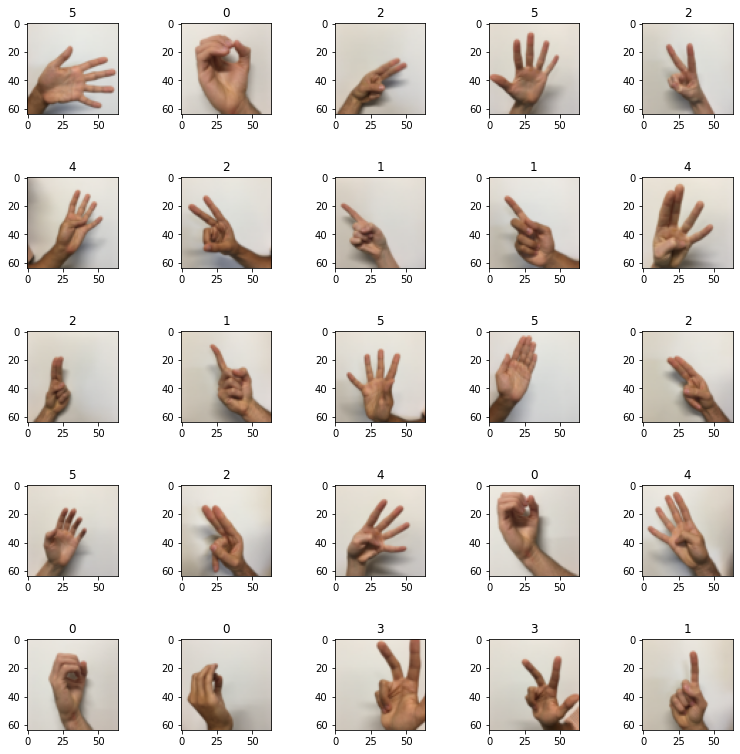

In [8]:
imageIter = iter(x_train)
labelIter = iter(y_train)
axs, fig  = plt.subplots(5, 5, figsize = (13, 13))
plt.subplots_adjust(wspace=.4, hspace= .7)

i = 0
for i, elements in enumerate(zip(imageIter, labelIter)):
    if i == 25: break

    plt.subplot(5, 5, i+1)
    plt.imshow(elements[0])
    plt.title(elements[1].numpy())

In [9]:
def processImage(img):
    # Process the images to our needs
    img = tf.cast(img, tf.float32)/255.
    img = tf.reshape(img, [-1])
    return img
new_train = x_train.map(processImage)
new_test = x_test.map(processImage)

In [10]:
def linear_function():
    # Linear function using tensorflow functions
    np.random.seed(1)
    X = tf.constant(np.random.randn(3,1), name = "X")
    W = tf.constant(np.random.randn(4,3), name = "W")
    b = tf.constant(np.random.randn(4,1), name = "b")
    
    Y = tf.add(tf.matmul(W,X), b)
    
    return Y

def sigmoid(z):
    # Sigmoid activation in tensor flow    
    z = tf.cast(z, tf.float32)
    a = tf.keras.activations.sigmoid(z)
    
    return a

def one_hot_matrix(label, depth=6):
    
    one_hot = tf.reshape(tf.one_hot(label, depth, axis = 0), [-1])
    
    return one_hot

In [11]:
new_y_test = y_test.map(one_hot_matrix)
new_y_train = y_train.map(one_hot_matrix)

In [ ]:
def initialize_parameters():
                     
    initializer = tf.keras.initializers.GlorotNormal(seed=1)   
    
    W1 = tf.Variable(initializer(shape=(25,12288)))
    b1 = tf.Variable(initializer(shape=(25,1)))
    W2 = tf.Variable(initializer(shape=(12,25)))
    b2 = tf.Variable(initializer(shape=(12,1)))
    W3 = tf.Variable(initializer(shape=(6,12)))
    b3 = tf.Variable(initializer(shape=(6,1)))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    # Forward propagation

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.linalg.matmul(W1, X), b1)
    A1 = tf.keras.activations.relu(Z1)
    Z2 = tf.add(tf.linalg.matmul(W2, A1), b2)
    A2 = tf.keras.activations.relu(Z2)
    Z3 = tf.add(tf.linalg.matmul(W3, A2), b3)
    A3 = tf.keras.activations.relu(Z2)
    
    return Z3
